In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# loading data
df = pd.read_csv("main_data.csv", index_col=0)
df = df.dropna()
#Data shuffling
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X = df.drop('criticality', axis=1).values
Y = df['criticality'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=42)
shuffled_data = shuffle(df.values, random_state=0)
# shuffled_data.shape

test_index = int(shuffled_data.shape[0] * 0.8)

X_train, X_test = shuffled_data[:test_index, :-1], shuffled_data[test_index:, :-1]
Y_train, Y_test = shuffled_data[:test_index, -1], shuffled_data[test_index:, -1]
# shuffled_data.shape
print(X_train.shape, X_test.shape)

(6568, 10) (1643, 10)


In [16]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=20)
clf.fit(X_train, Y_train)
print(clf.predict(X_test))

[1. 3. 3. ... 3. 1. 3.]


[[473  37  16]
 [ 32  76  32]
 [  3  13 961]]


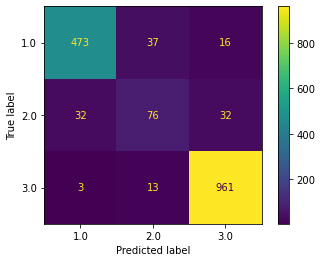

              precision    recall  f1-score   support

         1.0       0.93      0.90      0.91       526
         2.0       0.60      0.54      0.57       140
         3.0       0.95      0.98      0.97       977

    accuracy                           0.92      1643
   macro avg       0.83      0.81      0.82      1643
weighted avg       0.92      0.92      0.92      1643



In [17]:
#confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(confusion_matrix(Y_test, clf.predict(X_test)))
plot_confusion_matrix( clf, X_test, Y_test)
plt.show()

from sklearn.metrics import classification_report
clf_report = classification_report(Y_test, clf.predict(X_test))
print(clf_report)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.3s finished


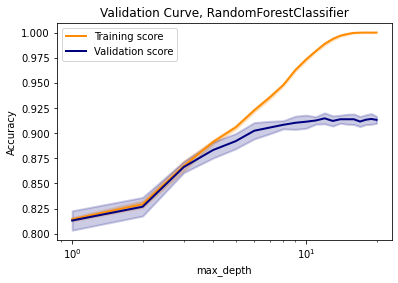

In [18]:
#validation curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
alpha_list = np.arange(1, 21)

train_scores, valid_scores = validation_curve(RandomForestClassifier(),  X_train, Y_train, 
                                              param_name="max_depth",
                                              param_range=alpha_list , 
                                              cv=5, 
                                              scoring = 'accuracy',
                                              verbose=1, n_jobs=-1
                                             )

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)


xlabel = 'max_depth'
ylabel = 'Accuracy'

plt_title = 'Validation Curve, RandomForestClassifier'#.format(k)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
plt.semilogx(alpha_list, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(alpha_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(alpha_list, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(alpha_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()

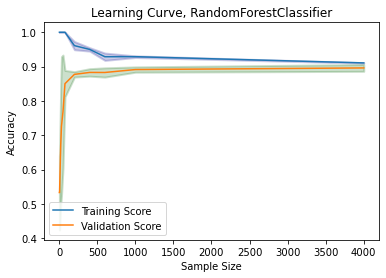

In [19]:
#learning Curve
from sklearn.model_selection import learning_curve
#import matplotlib.pyplot as plt
#import numpy as np
ns_list = np.array([ 3, 5, 10, 20 , 30 , 50, 76, 200,400,600,1000,4000])
ncv = 5

ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=5),
                                                   X = X_train, y = Y_train,
                                                   train_sizes = ns_list,
                                                   cv = ncv,
                                                   scoring = 'accuracy',
                                                   n_jobs= -1
                                                   )

train_scores_mean =  train_scores.mean(axis = 1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean =  validation_scores.mean(axis = 1)
validation_scores_std  = validation_scores.std(axis = 1)

xlabel = 'Sample Size'
ylabel = 'Accuracy'

plt_title = 'Learning Curve, RandomForestClassifier'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, validation_scores_mean, label = 'Validation Score')

plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(ns_list, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.show()
